In [1]:
import nrrd 
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
import pydicom
import glob

In [3]:
path = 'PROSTATE-DIAGNOSIS'
dcm_dict = dict()  # create an empty list
fns=[]

for dirName, subdirList, fileList in os.walk(path):
    imgs =[]
    for s in fileList:
        if '.dcm' in s:
            ptn_name = dirName.split('\\')[1]
            fns.append(fns)
            img = pydicom.read_file(f'{dirName}\\{s}').pixel_array.astype(float)
            imgs.append(img)
    if len(imgs)==0:
        continue
    dcm_dict[ptn_name] = imgs

In [5]:
import cv2
from fastai.medical.imaging import *
from fastai.vision.all import *

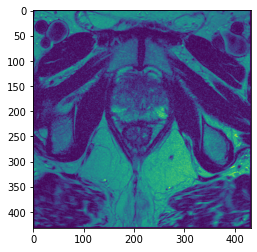

In [6]:
plt.imshow(dcm_dict[ptn_name][10])

In [9]:
for ptn_name in dcm_dict.keys():
    imgs = tensor(dcm_dict[ptn_name])
    if ptn_name =='ProstateDx-01-0006':
        masks = np.rollaxis(nrrd.read(f'nnrd/{ptn_name}_correctedLabels.nrrd')[0], 2)
    else:
        masks = np.rollaxis(nrrd.read(f'nnrd/{ptn_name}.nrrd')[0], 2)

    img = tensor(imgs[0])
    brks = img.freqhist_bins(n_bins=3500);
    imgs = imgs.hist_scaled(brks)
    os.makedirs(f'isbn/{ptn_name}/images', exist_ok=True)
    os.makedirs(f'isbn/{ptn_name}/masks', exist_ok=True)
    for i, (x,y) in enumerate(zip(imgs, masks)):
        ret,y = cv2.threshold(y,0,1,cv2.THRESH_BINARY)
        y = np.rot90(y,k=3)
        y = np.fliplr(y)
        cv2.imwrite(f'isbn/{ptn_name}/images/{i:02d}.png', x.numpy()*255)
        cv2.imwrite(f'isbn/{ptn_name}/masks/{i:02d}.png', y)
        

KeyboardInterrupt: 